In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv(filepath_or_buffer='rotten_tomatoes_movies.csv')

In [ ]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


content rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

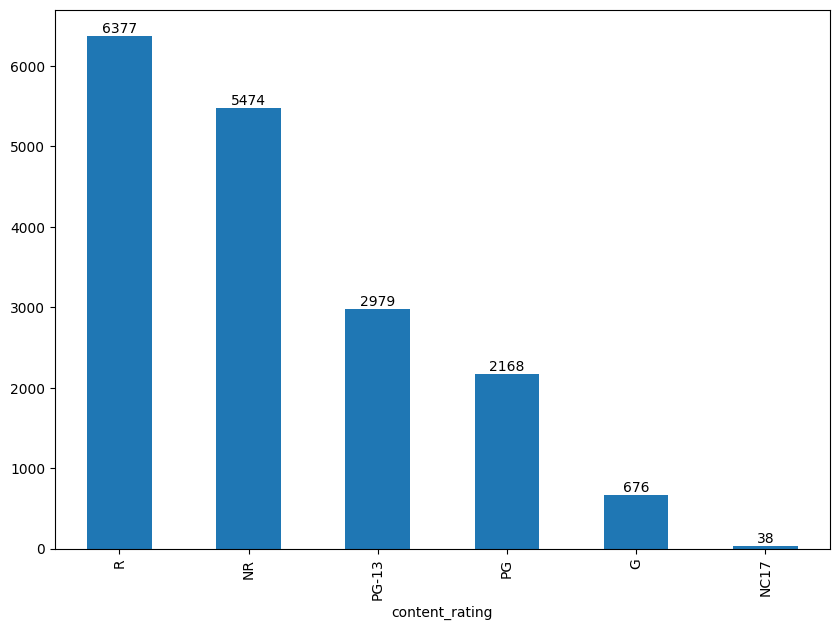

In [ ]:
print(f'content rating category: {df.content_rating.unique()}')

ax=df.content_rating.value_counts().plot(kind='bar',figsize=(10,7))
ax.bar_label(ax.containers[0])

In [ ]:
content_rating = pd.get_dummies(df.content_rating, dtype=int)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

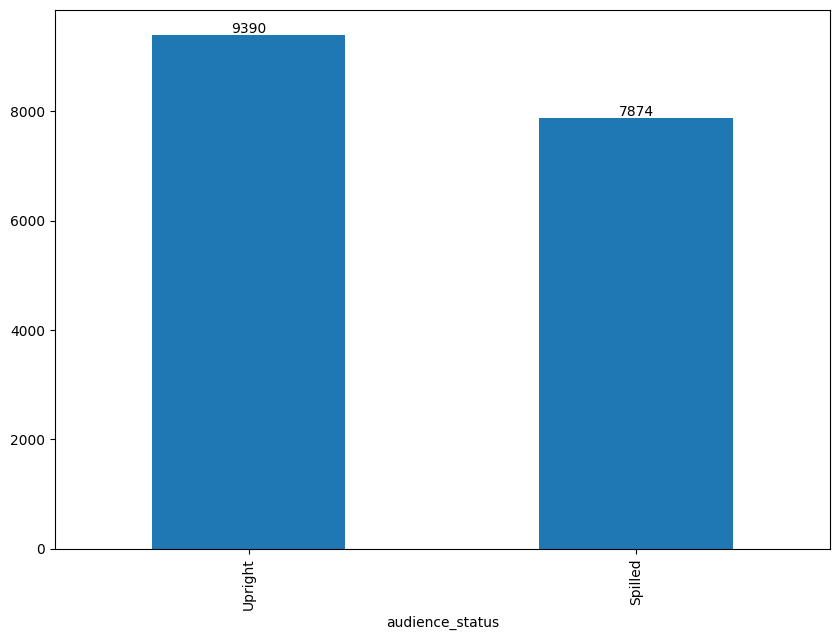

In [ ]:
print(f'Audience status category: {df.audience_status.unique()}')

ax=df.audience_status.value_counts().plot(kind='bar',figsize=(10,7))
ax.bar_label(ax.containers[0])

In [ ]:
audience_status = pd.DataFrame(df.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

<ipython-input-8-5c452fb455bc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audience_status = pd.DataFrame(df.audience_status.replace(['Spilled','Upright'],[0,1]))


,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [ ]:
tomatometer_status = pd.DataFrame(df.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status.head()

<ipython-input-9-1d19a5daf4fc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tomatometer_status = pd.DataFrame(df.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))


,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


In [ ]:
df_feature = pd.concat([df[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_rotten_critics_count']], content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,3,1,0,0,0,0,0,1.0,1.0


In [ ]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
len(df_feature)

17017

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

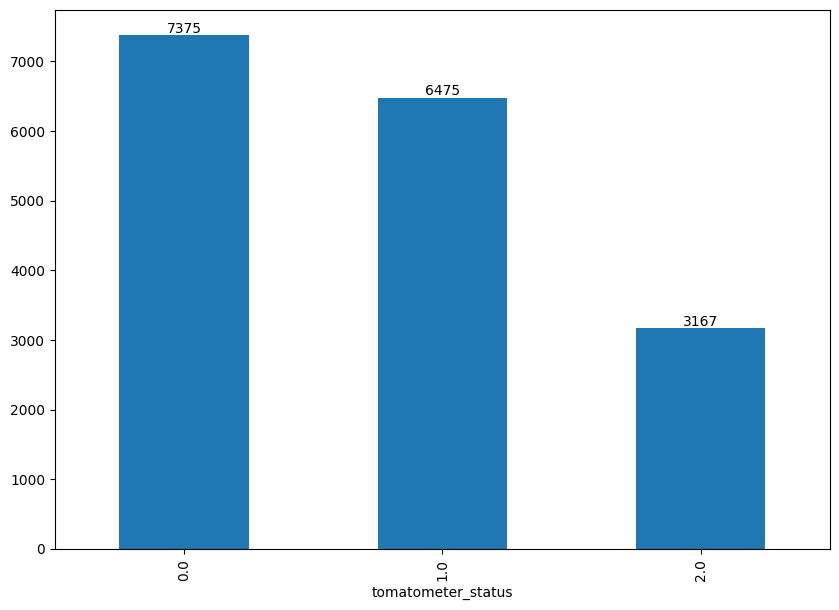

In [ ]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar',figsize=(10,7))
ax.bar_label(ax.containers[0])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of the test data is{len(X_test)}')

Size of training data is 13613 and the size of the test data is3404


In [ ]:
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree_3_leaf.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [ ]:
y_predict = tree_3_leaf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9456521739130435
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       1.00      0.86      0.92      1286
         2.0       0.77      1.00      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.95      0.93      3404
weighted avg       0.96      0.95      0.95      3404



In [ ]:
print(confusion_matrix(Y_test, y_predict))

[[1488    0    0]
 [   0 1103  183]
 [   0    2  628]]


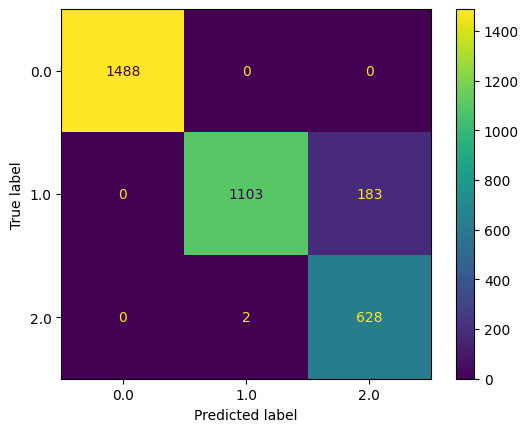

In [ ]:
cm = confusion_matrix(Y_test, y_predict, labels=tree_3_leaf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_3_leaf.classes_)
disp.plot()
plt.show()

[Text(0.4, 0.8333333333333334, 'tomatometer_rating <= 59.5\ngini = 0.633\nsamples = 13613\nvalue = [5887, 5189, 2537]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5887\nvalue = [5887, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'tomatometer_count <= 39.5\ngini = 0.441\nsamples = 7726\nvalue = [0, 5189, 2537]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.003\nsamples = 4379\nvalue = [0, 4372, 7]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.369\nsamples = 3347\nvalue = [0, 817, 2530]')]

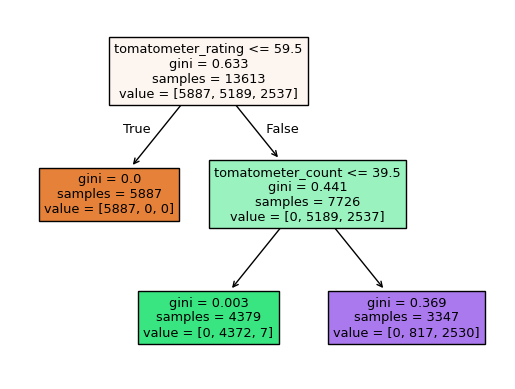

In [ ]:
plot_tree(tree_3_leaf, feature_names=X_train.columns, filled=True)

In [ ]:
tree = DecisionTreeClassifier(random_state=4)
tree.fit(X_train, Y_train)
y_pred=tree.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9873678025851939
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.98      0.98      0.98      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.98      0.98      0.98      3404
weighted avg       0.99      0.99      0.99      3404



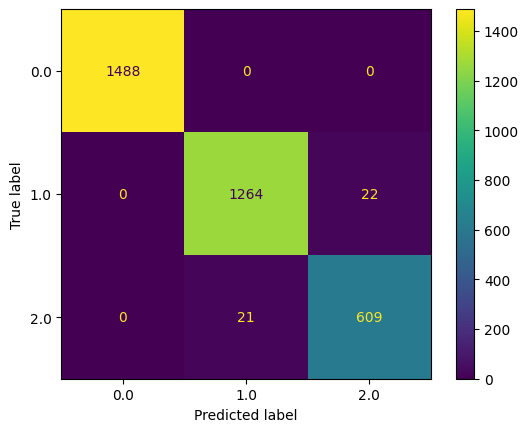

In [ ]:
cm_1 = confusion_matrix(Y_test, y_pred, labels=tree.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1,
                              display_labels=tree.classes_)
disp_1.plot()
plt.show()

In [ ]:
rf= RandomForestClassifier(random_state=2)
rf.fit(X_train, Y_train)
y_predict=rf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9908930669800236
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



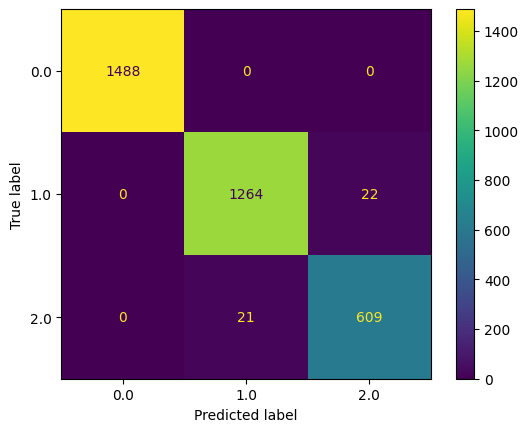

In [ ]:
cm_2 = confusion_matrix(Y_test, y_pred, labels=rf.classes_)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_1,
                              display_labels=rf.classes_)
disp_2.plot()
plt.show()

runtime=0.008478207927241303
tomatometer_rating=0.5104033278404031
tomatometer_count=0.1419343908404473
audience_rating=0.06417743769809091
audience_count=0.02398623498391267
tomatometer_top_critics_count=0.06487075381936468
tomatometer_rotten_critics_count=0.13244841413680009
G=0.00040854570051734895
NC17=2.2193559264972653e-05
NR=0.005512052049006392
PG=0.0007076712356797361
PG-13=0.0029088413897770038
R=0.002575959113569766
audience_status=0.04156596970592484


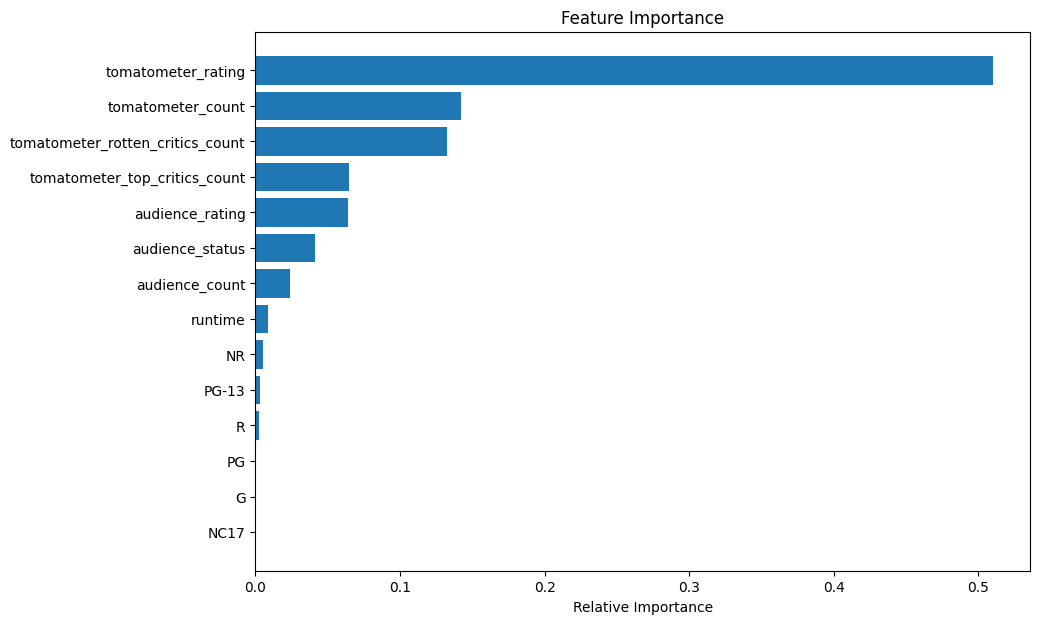

In [ ]:
feature_importance = rf.feature_importances_

for i, feature in enumerate(X_train.columns):
    print(f'{feature}={feature_importance[i]}')

indices = np.argsort(feature_importance)
plt.figure(figsize=(10,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG', 'G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size=0.3, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of the test data is {len(X_test)}')

Size of training data is 11911 and the size of the test data is 5106


In [ ]:
rf_1= RandomForestClassifier(random_state=2)
rf_1.fit(X_train, Y_train)
y_predict=rf_1.predict(X_test)
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

0.9923619271445359
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2216
         1.0       0.99      0.99      0.99      1940
         2.0       0.98      0.98      0.98       950

    accuracy                           0.99      5106
   macro avg       0.99      0.99      0.99      5106
weighted avg       0.99      0.99      0.99      5106

